In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Db_data = pd.read_csv('diabetes.csv')

Db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Establishing a seed to ensure repeatability
np.random.seed(40)

# Choosing 25 observations at random for the sample.
Db_sample = Db_data.sample(n=25)

In [4]:
# Determining the sample's mean and highest glucose readings.
Glu_sample_mean = Db_sample['Glucose'].mean()
Glu_sample_highest = Db_sample['Glucose'].max()

In [5]:
# Determining the highest and population mean glucose readings.
Glu_population_mean = Db_data['Glucose'].mean()
Glu_population_highest = Db_data['Glucose'].max()

In [6]:
# Displaying the figures
print("Sample Mean of Glucose:", Glu_sample_mean)
print("Sample Highest of Glucose:", Glu_sample_highest)
print("\nPopulation Mean of Glucose:", Glu_population_mean)
print("Population Highest of Glucose:", Glu_population_highest)

Sample Mean of Glucose: 121.2
Sample Highest of Glucose: 184

Population Mean of Glucose: 120.89453125
Population Highest of Glucose: 199


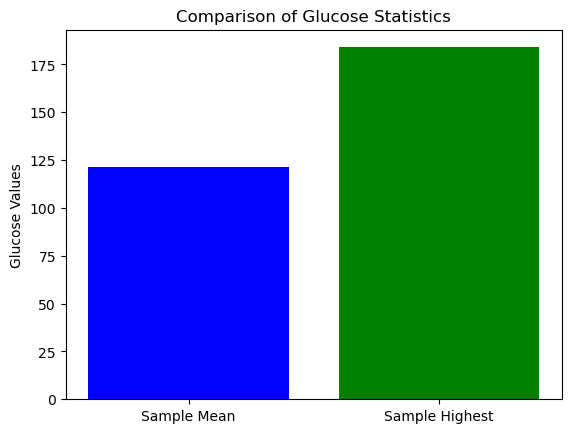

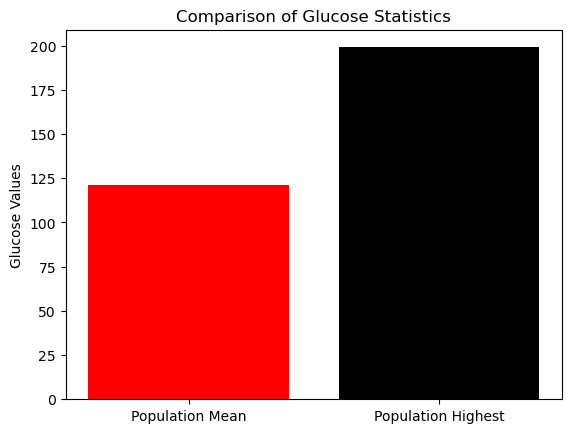

In [7]:
# Making a comparative bar chart.

labels_sam = ['Sample Mean', 'Sample Highest']
values_sam = [Glu_sample_mean, Glu_sample_highest]

plt.bar(labels_sam, values_sam, color=['blue', 'green'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

# Making a comparative bar chart.
labels_pop= ['Population Mean', 'Population Highest']
values_pop= [Glu_population_mean, Glu_population_highest]
plt.bar(labels_pop, values_pop, color=['red', 'black'])
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()

In [8]:
# Determining the sample's BMI's 98th percentile.
sam_bmi_98th_percentile = np.percentile(Db_sample['BMI'], 98)

# Determining the population's 98th percentile for BMI.
pop_bmi_98th_percentile = np.percentile(Db_data['BMI'], 98)

In [9]:
# Displaying the percentiles
print("BMI of Sample 98th Percentile :", sam_bmi_98th_percentile)
print("BMI of Population 98th Percentile :", pop_bmi_98th_percentile)

BMI of Sample 98th Percentile : 47.151999999999994
BMI of Population 98th Percentile : 47.52599999999996


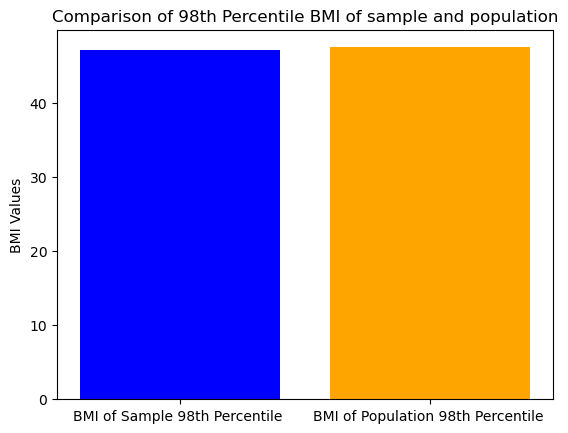

In [10]:
# Creating a bar chart for comparison
labels_per = ['BMI of Sample 98th Percentile ', 'BMI of Population 98th Percentile ']
values_per = [sam_bmi_98th_percentile, pop_bmi_98th_percentile]

plt.bar(labels_per, values_per, color=['blue', 'orange'])
plt.title('Comparison of 98th Percentile BMI of sample and population')
plt.ylabel('BMI Values')
plt.show()

In [11]:
# Quantities and dimensions of each bootstrap sample

sample_num = 500
sample_size = 150

In [12]:
# Creating empty arrays at first to hold bootstrap data.
mean_boot= np.zeros(sample_num)
stddev_boot = np.zeros(sample_num)
perc_boot = np.zeros(sample_num)

In [13]:
# Carrying out bootstrap sampling

for i in range(sample_num):
   # Create a bootstrap sample by substituting
    boot_sample = np.random.choice(Db_data['BloodPressure'], size=sample_size, replace=True)

   # Determining the bootstrap sample's mean, standard deviation, and 92th percentile.
    mean_boot[i] = np.mean(boot_sample)
    stddev_boot[i] = np.std(boot_sample)
    perc_boot[i] = np.percentile(boot_sample, 92)

In [14]:
# Computing BloodPressure population statistics.
mean_pop_bp = Db_data['BloodPressure'].mean()
stddev_pop_bp = Db_data['BloodPressure'].std()
perc_92_pop_bp = np.percentile(Db_data['BloodPressure'], 92)

In [15]:
# Showing the demographic data
print("Population Mean of BloodPressure:", mean_pop_bp)
print("Population Standard Deviation of BloodPressure:", stddev_pop_bp)
print("Population 92th Percentile of BloodPressure:", perc_92_pop_bp)

Population Mean of BloodPressure: 69.10546875
Population Standard Deviation of BloodPressure: 19.355807170644777
Population 92th Percentile of BloodPressure: 88.0


In [16]:
# Determining the bootstrap statistics' mean, standard deviation, and 92th percentile.
boot_mean_mean = np.mean(mean_boot)
boot_mean_stddev = np.mean(stddev_boot)
boot_mean_perc_92 = np.mean(perc_boot)

In [17]:
# Presenting the statistics from the bootstrap.
print("\nBootstrap Mean of BloodPressure:", boot_mean_mean)
print("Bootstrap Standard Deviation of BloodPressure:", boot_mean_stddev)
print("Bootstrap 92th Percentile of BloodPressure:", boot_mean_perc_92)


Bootstrap Mean of BloodPressure: 69.05157333333334
Bootstrap Standard Deviation of BloodPressure: 19.26053957995496
Bootstrap 92th Percentile of BloodPressure: 88.55056000000002


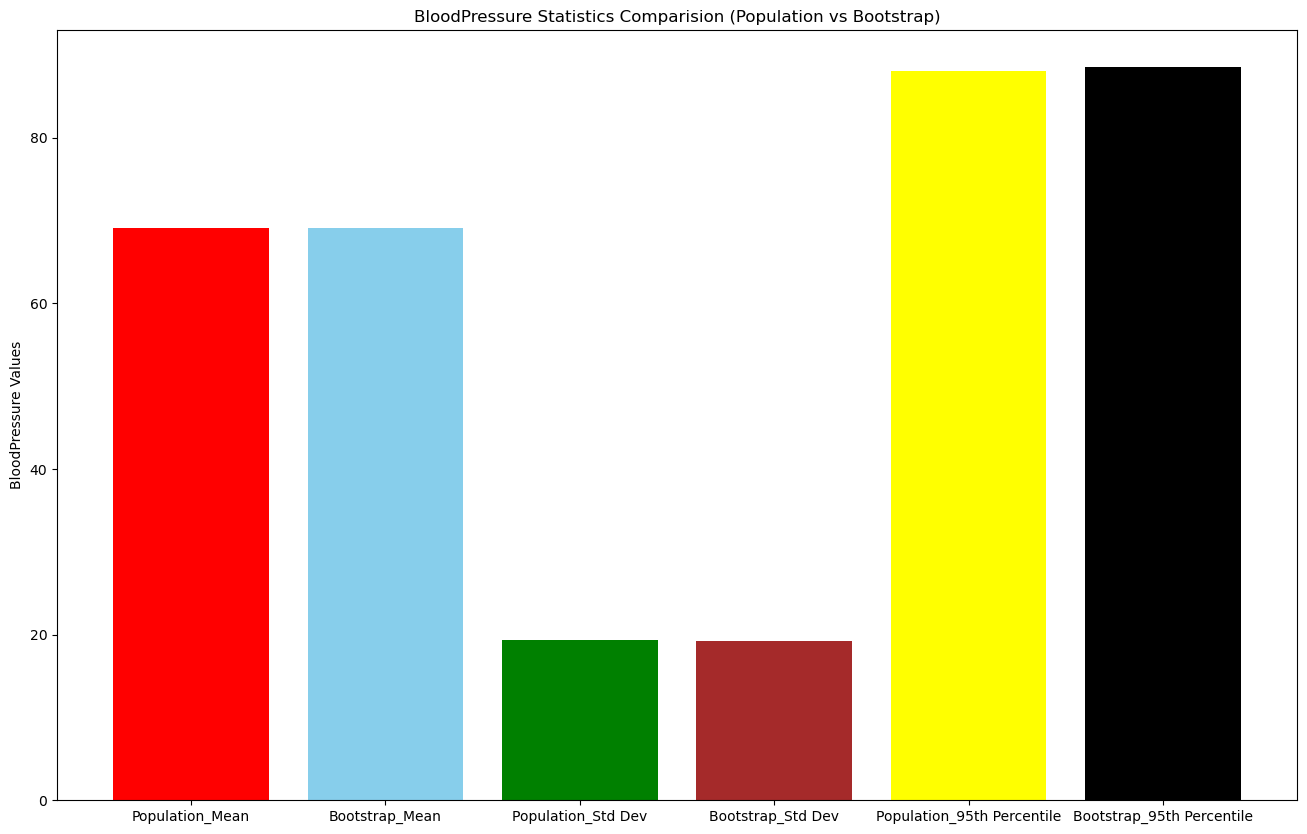

In [18]:
# Creating a bar chart for comparison
plt.figure(figsize=(16, 10))
labels_all = ['Population_Mean', 'Bootstrap_Mean', 'Population_Std Dev', 'Bootstrap_Std Dev', 'Population_95th Percentile', 'Bootstrap_95th Percentile']
values_all = [mean_pop_bp, boot_mean_mean, stddev_pop_bp, boot_mean_stddev, perc_92_pop_bp, boot_mean_perc_92]

plt.bar(labels_all, values_all, color=['red', 'skyblue', 'green', 'brown', 'yellow', 'black'])
plt.title('BloodPressure Statistics Comparision (Population vs Bootstrap)')
plt.ylabel('BloodPressure Values')
plt.show()